In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

In [ ]:
data_train = pd.read_json("/content/drive/MyDrive/Deeeep learning/Sarcasm Headlines/train_Sarcasm_Headlines_Dataset.json", lines=True)
train_labels = data_train.is_sarcastic.values
bert_embeddings_train = np.load("/content/drive/MyDrive/Deeeep learning/embeddings/bert-headlines-50epochs_emb_train.npy")

data_test = pd.read_json("/content/drive/MyDrive/Deeeep learning/Sarcasm Headlines/test_Sarcasm_Headlines_Dataset.json", lines=True)
test_labels = data_test.is_sarcastic.values
bert_embeddings_test = np.load("/content/drive/MyDrive/Deeeep learning/embeddings/bert-headlines-50epochs_emb_test.npy")

In [ ]:
isarcasm_test = pd.read_csv('/content/drive/MyDrive/Deeeep learning/iSarcasm/isarcasm_test.csv')
isarcasm_test_labels = isarcasm_test.sarcastic.values
isarcasm_embeddings = np.load('/content/drive/MyDrive/Deeeep learning/embeddings/isarcasm_bert-headlines-50epochs_emb.npy')

## Sklearn classifiers


In [ ]:
X_train = bert_embeddings_train
y_train = train_labels
X_test = bert_embeddings_test
y_test = test_labels

In [ ]:
# Random forest
random_forest = RandomForestClassifier(max_depth=10, random_state=666, n_jobs=-1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=666)

In [ ]:
y_pred_rf = random_forest.predict(X_test)
print("Random Forest \nMetrics for prediction results:")
print(classification_report(y_test, y_pred_rf))

Random Forest 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76      2248
           1       0.75      0.67      0.71      2046

    accuracy                           0.74      4294
   macro avg       0.74      0.74      0.74      4294
weighted avg       0.74      0.74      0.74      4294



In [ ]:
y_pred_rf_is = random_forest.predict(isarcasm_embeddings)
print("iSarcasm \nRandom Forest \nMetrics for prediction results:")
print(classification_report(isarcasm_test_labels, y_pred_rf_is))

iSarcasm 
Random Forest 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1200
           1       0.10      0.15      0.12       200

    accuracy                           0.69      1400
   macro avg       0.47      0.46      0.47      1400
weighted avg       0.74      0.69      0.71      1400



In [ ]:
# Ada Boost
ada_boost = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=666)
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=666)

In [ ]:
y_pred_ada = ada_boost.predict(X_test)
print("Ada Boost \nMetrics for prediction results:")
print(classification_report(y_test, y_pred_ada))

Ada Boost 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      2248
           1       0.71      0.70      0.71      2046

    accuracy                           0.72      4294
   macro avg       0.72      0.72      0.72      4294
weighted avg       0.72      0.72      0.72      4294



In [ ]:
y_pred_ada_is = ada_boost.predict(isarcasm_embeddings)
print("iSarcasm \nAda Boost \nMetrics for prediction results:")
print(classification_report(isarcasm_test_labels, y_pred_ada_is))

iSarcasm 
Ada Boost 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.85      0.37      0.52      1200
           1       0.14      0.60      0.23       200

    accuracy                           0.41      1400
   macro avg       0.49      0.49      0.37      1400
weighted avg       0.75      0.41      0.48      1400



In [ ]:
# kNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred_knn = knn.predict(X_test)
print("kNN \nMetrics for prediction results:")
print(classification_report(y_test, y_pred_knn))

kNN 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2248
           1       0.75      0.75      0.75      2046

    accuracy                           0.76      4294
   macro avg       0.76      0.76      0.76      4294
weighted avg       0.76      0.76      0.76      4294



In [ ]:
y_pred_knn_is = knn.predict(isarcasm_embeddings)
print("iSarcasm \nkNN \nMetrics for prediction results:")
print(classification_report(isarcasm_test_labels, y_pred_knn_is))

iSarcasm 
kNN 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1200
           1       0.16      0.09      0.11       200

    accuracy                           0.80      1400
   macro avg       0.51      0.50      0.50      1400
weighted avg       0.76      0.80      0.78      1400



In [ ]:
# kNN cosine
knn_cos = KNeighborsClassifier(n_neighbors=20, metric='cosine')
knn_cos.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=20)

In [ ]:
y_pred_knn_cos = knn_cos.predict(X_test)
print("kNN cosine\nMetrics for prediction results:")
print(classification_report(y_test, y_pred_knn_cos))

kNN cosine
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      2248
           1       0.78      0.72      0.75      2046

    accuracy                           0.77      4294
   macro avg       0.77      0.77      0.77      4294
weighted avg       0.77      0.77      0.77      4294



In [ ]:
y_pred_knn_cos_is = knn_cos.predict(isarcasm_embeddings)
print("iSarcasm \nkNN cosine \nMetrics for prediction results:")
print(classification_report(isarcasm_test_labels, y_pred_knn_cos_is))

iSarcasm 
kNN cosine 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1200
           1       0.13      0.19      0.16       200

    accuracy                           0.71      1400
   macro avg       0.49      0.49      0.49      1400
weighted avg       0.75      0.71      0.73      1400



In [ ]:
# Linear classifier
linear = SGDClassifier(max_iter=1000, tol=1e-3)
linear.fit(X_train, y_train)

SGDClassifier()

In [ ]:
y_pred_linear = linear.predict(X_test)
print("Linear classifier \nMetrics for prediction results:")
print(classification_report(y_test, y_pred_linear))

Linear classifier 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      2248
           1       0.79      0.85      0.82      2046

    accuracy                           0.82      4294
   macro avg       0.82      0.82      0.82      4294
weighted avg       0.82      0.82      0.82      4294



In [ ]:
y_pred_linear_is = linear.predict(isarcasm_embeddings)
print("iSarcasm \nLinear classifier \nMetrics for prediction results:")
print(classification_report(isarcasm_test_labels, y_pred_linear_is))

iSarcasm 
Linear classifier 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.86      0.33      0.48      1200
           1       0.15      0.69      0.24       200

    accuracy                           0.38      1400
   macro avg       0.51      0.51      0.36      1400
weighted avg       0.76      0.38      0.44      1400



In [ ]:
# sklearn MLP
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [ ]:
y_pred_mlp = mlp.predict(X_test)
print("MLP \nMetrics for prediction results:")
print(classification_report(y_test, y_pred_mlp))

MLP 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2248
           1       0.82      0.82      0.82      2046

    accuracy                           0.83      4294
   macro avg       0.83      0.83      0.83      4294
weighted avg       0.83      0.83      0.83      4294



In [ ]:
y_pred_mlp_is = mlp.predict(isarcasm_embeddings)
print("iSarcasm \nMLP \nMetrics for prediction results:")
print(classification_report(isarcasm_test_labels, y_pred_mlp_is))

iSarcasm 
MLP 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1200
           1       0.15      0.03      0.04       200

    accuracy                           0.84      1400
   macro avg       0.50      0.50      0.48      1400
weighted avg       0.76      0.84      0.79      1400



In [ ]:
# SVM exponential kernel
from sklearn.svm import SVC
svm = SVC(kernel='rbf').fit(X_train, y_train)

In [ ]:
y_pred_svm = svm.predict(X_test)
print("SVM \nMetrics for prediction results:")
print(classification_report(y_test, y_pred_svm))

SVM 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2248
           1       0.83      0.84      0.84      2046

    accuracy                           0.84      4294
   macro avg       0.84      0.84      0.84      4294
weighted avg       0.84      0.84      0.84      4294



In [ ]:
y_pred_svm_is = svm.predict(isarcasm_embeddings)
print("iSarcasm \nSVM \nMetrics for prediction results:")
print(classification_report(isarcasm_test_labels, y_pred_svm_is))

iSarcasm 
SVM 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1200
           1       0.15      0.23      0.18       200

    accuracy                           0.71      1400
   macro avg       0.50      0.51      0.50      1400
weighted avg       0.76      0.71      0.73      1400



## Visualization

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
import umap
import matplotlib.pyplot as plt

In [ ]:
manifold_train = umap.UMAP().fit(X_train)
X_test_reduced = manifold_train.transform(X_test)

Text(0.5, 1.0, 'UMAP visualization of contrastive embeddings (Original sarcastic headlines)')

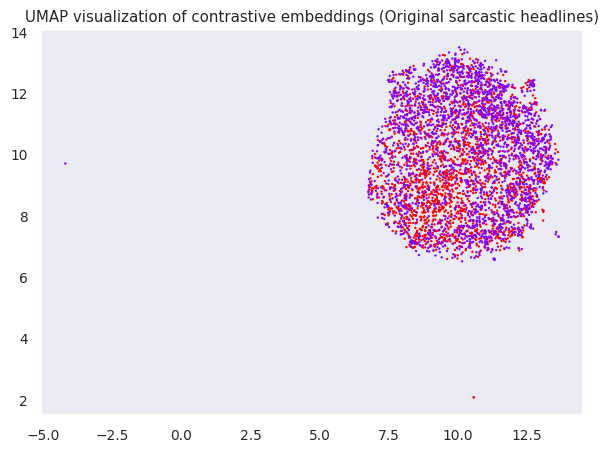

In [ ]:
sns.set(style='dark', font_scale=0.9, palette="hls", rc={'figure.figsize':(7,5)})
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_test, s=0.5, cmap='rainbow')
plt.title("UMAP visualization of contrastive embeddings (Original sarcastic headlines)")

In [ ]:
isarcasm_test_reduced = manifold_train.transform(isarcasm_embeddings)

Text(0.5, 1.0, 'UMAP visualization of contrastive embeddings (iSarcasm)')

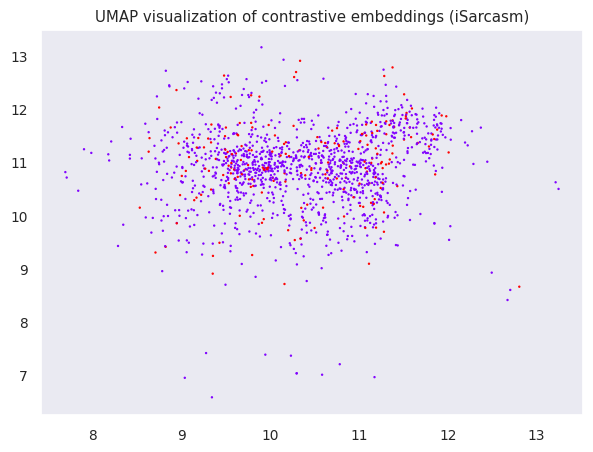

In [ ]:
sns.set(style='dark', font_scale=0.9, palette="hls", rc={'figure.figsize':(7,5)})
plt.scatter(isarcasm_test_reduced[:, 0], isarcasm_test_reduced[:, 1], c=isarcasm_test_labels, s=0.5, cmap='rainbow')
plt.title("UMAP visualization of contrastive embeddings (iSarcasm)")